In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import itertools
import os

In [2]:
def plot_from_csv(file_name, x_column_name = ["V_mon", "I_mon"]):
    """
    Imports two columns from a CSV file and displays the FFT spectrum of the x column up to the Nyquist frequency.

    Parameters:
        file_name (str): Path to the CSV file.
        x_column_name (str): The name of the x-column in the CSV.
        sample_rate (float): Sampling rate of the data in Hz.
    """
    # Import the CSV file using pandas
    data = pd.read_csv(file_name)

    # Extract the x column
    voltage = data[x_column_name[0]]
    current = data[x_column_name[1]]

    # find total ramp time from file name 
    match = re.search(r'_(\d+)s', file_name)
    ramp_time = match.group(1)
    t_stamp = np.linspace(0,float(ramp_time), len(voltage))

    fig, ax = plt.subplots(1,2, figsize = [15,6])
    ax[0].plot(t_stamp, voltage)
    ax[1].plot(t_stamp, current)
    ax[0].set_xlabel("time/s ")
    ax[0].set_ylabel("voltage / kV ")
    ax[1].set_xlabel("time/s ")
    ax[1].set_ylabel("current / uA ")

In [3]:
def plot_combined(file_name, x_column_name= ["V_mon", "I_mon"]):
    ramp_time_tot = 0
    ramp_time_single = []

    V_tot = []
    I_tot = []

    for f_name in file_name:
        # Import the CSV file using pandas
        data = pd.read_csv(f_name)
        # Extract the x column
        V_tot.append(data[x_column_name[0]].squeeze().astype(float).tolist())
        I_tot.append(data[x_column_name[1]].squeeze().astype(float).tolist())

        # find total ramp time from file name 
        match = re.search(r'_(\d+)s', f_name)
        ramp_time_single.append(match.group(1))
        ramp_time_tot += float(ramp_time_single[-1])

    V_tot = np.array(list(itertools.chain(*V_tot))) / 10 * 30
    I_tot = np.array(list(itertools.chain(*I_tot))) / 10 * 400
    time_stamp = np.linspace(0,float(ramp_time_tot), len(V_tot))

    fig, ax = plt.subplots(1,2, figsize = [15,6])
    ax[0].plot(time_stamp, V_tot)
    ax[1].plot(time_stamp, I_tot)
    ax[0].set_xlabel("time/s ")
    ax[0].set_ylabel("voltage / kV ")
    ax[1].set_xlabel("time/s ")
    ax[1].set_ylabel("current / uA ")

    match = re.search(r'_(\d+)s', file_name[0])
    fig.suptitle(f'30kV ramp, time each ramp {int(ramp_time_single[0]):.1f},{int(ramp_time_single[1]):.1f},{int(ramp_time_single[2]):.1f}s', fontsize=20)


#### Plot 2/25 ramp

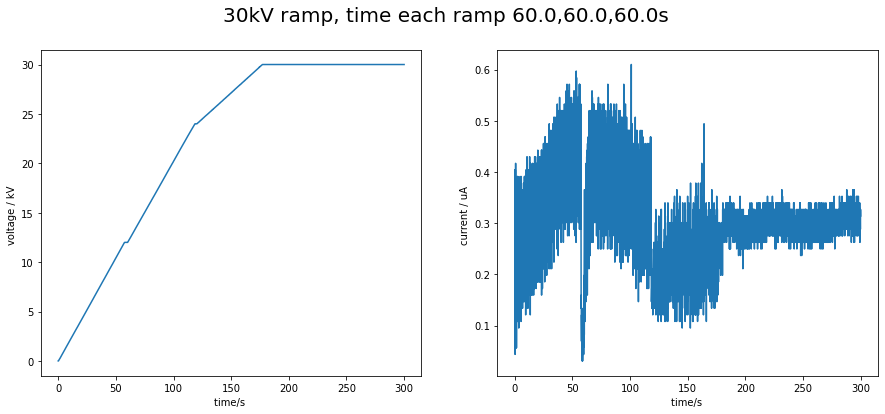

In [138]:
os.chdir('C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-25_2025_test')
file_name = ['ramp_and_record_0.000V_to_4.000V_step_0.01V_in_60s_2025-02-25_16-25-30_DAQ.csv','ramp_and_record_4.000V_to_8.000V_step_0.01V_in_60s_2025-02-25_16-27-01_DAQ.csv','ramp_and_record_8.000V_to_10.000V_step_0.01V_in_60s_2025-02-25_16-28-59_DAQ.csv','rec_at_10_recording_120s_2025-02-25_16-31-06_DAQ.csv']
plot_combined(file_name)

#### Plot 2/26 ramp

plot ramp up

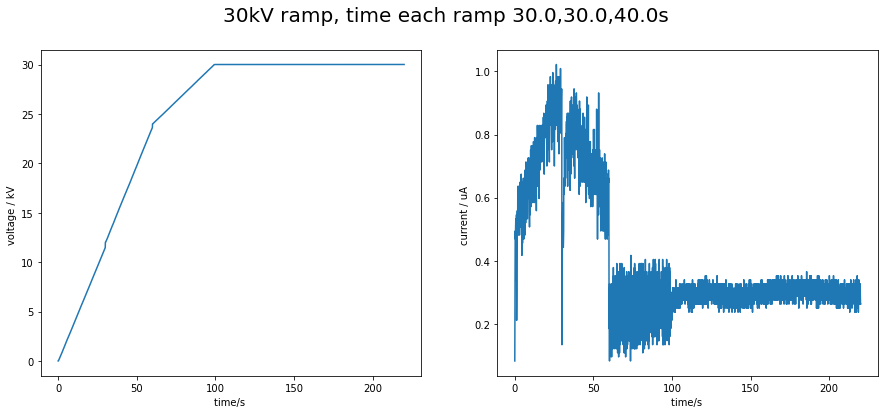

In [139]:
os.chdir('C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-26-2025_test')
file_name = ['ramp_and_record_0.000V_to_4.000V_step_0.01V_in_30s_2025-02-26_16-40-36_DAQ.csv','ramp_and_record_4.000V_to_8.000V_step_0.01V_in_30s_2025-02-26_16-42-09_DAQ.csv','ramp_and_record_8.000V_to_10.000V_step_0.01V_in_40s_2025-02-26_16-43-55_DAQ.csv','rec_at_10_recording_120s_2025-02-26_16-45-23_DAQ.csv']
plot_combined(file_name)

plot ramp down

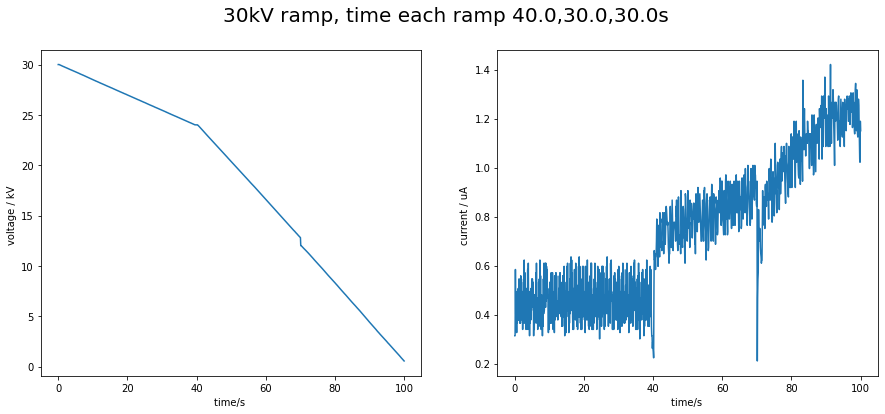

In [140]:
file_name = ['ramp_and_record_10.000V_to_8.000V_step_0.01V_in_40s_2025-02-26_16-48-07_DAQ.csv','ramp_and_record_8.000V_to_4.000V_step_0.01V_in_30s_2025-02-26_16-49-22_DAQ.csv','ramp_and_record_4.000V_to_0.000V_step_0.01V_in_30s_2025-02-26_16-50-20_DAQ.csv']
plot_combined(file_name)

#### Plot 2/26 ramp2

plot ramp up

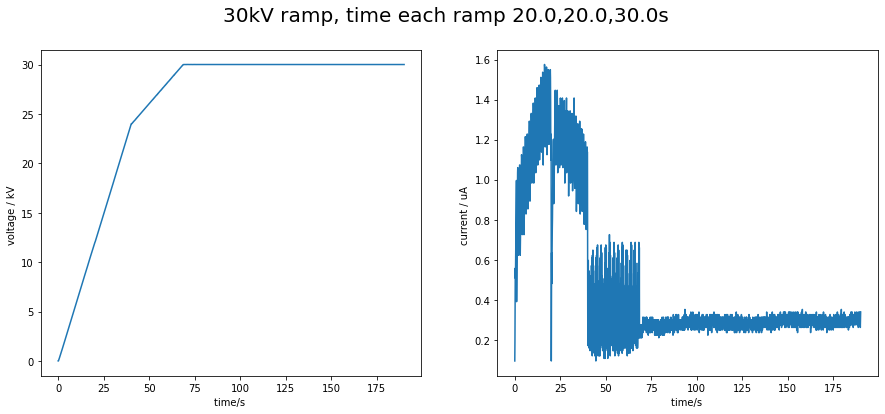

In [160]:
os.chdir('C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-26-2025_test2')
file_name = ['ramp_and_record_0.000V_to_4.000V_step_0.02V_in_20s_2025-02-26_17-15-31_DAQ.csv','ramp_and_record_4.000V_to_8.000V_step_0.02V_in_20s_2025-02-26_17-16-20_DAQ.csv','ramp_and_record_8.000V_to_10.000V_step_0.02V_in_30s_2025-02-26_17-17-03_DAQ.csv','rec_at_10_recording_120s_2025-02-26_17-17-52_DAQ.csv']
plot_combined(file_name)

plot ramp down

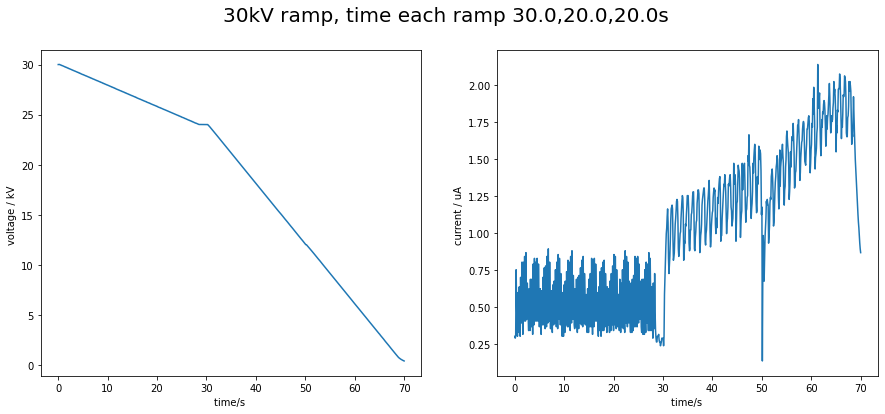

In [142]:
file_name = ['ramp_and_record_10.000V_to_8.000V_step_0.02V_in_30s_2025-02-26_17-21-00_DAQ.csv','ramp_and_record_8.000V_to_4.000V_step_0.02V_in_20s_2025-02-26_17-21-58_DAQ.csv','ramp_and_record_4.000V_to_0.000V_step_0.02V_in_20s_2025-02-26_17-23-21_DAQ.csv']
plot_combined(file_name)

#### Plot 2/27 ramp one step

In [10]:
def plot_combined(file_name, x_column_name= ["V_mon_neg", "I_mon_neg","V_mon_pos","I_mon_pos"]):
    ramp_time_tot = 0
    ramp_time_single = []

    V_tot_pos = []
    I_tot_pos = []
    V_tot_neg = []
    I_tot_neg = []

    for f_name in file_name:
        # Import the CSV file using pandas
        data = pd.read_csv(f_name)
        # Extract the x column
        V_tot_neg.append(data[x_column_name[0]].squeeze().astype(float).tolist())
        I_tot_neg.append(data[x_column_name[1]].squeeze().astype(float).tolist())
        V_tot_pos.append(data[x_column_name[2]].squeeze().astype(float).tolist())
        I_tot_pos.append(data[x_column_name[3]].squeeze().astype(float).tolist())

        # find total ramp time from file name 
        match = re.search(r'_(\d+)s', f_name)
        ramp_time_single.append(match.group(1))
        ramp_time_tot += float(ramp_time_single[-1])

    V_tot_pos = np.array(list(itertools.chain(*V_tot_pos))) / 10 * 30
    V_tot_neg = np.array(list(itertools.chain(*V_tot_neg))) / 10 * 30
    I_tot_pos = np.array(list(itertools.chain(*I_tot_pos))) / 10 * 400
    I_tot_neg = np.array(list(itertools.chain(*I_tot_neg))) / 10 * 400
    time_stamp = np.linspace(0,float(ramp_time_tot), len(V_tot_pos))

    fig, ax = plt.subplots(1,2, figsize = [15,6])
    ax[0].plot(time_stamp, V_tot_pos)
    ax[0].plot(time_stamp, V_tot_neg)
    ax[1].plot(time_stamp, I_tot_pos)
    ax[1].plot(time_stamp, I_tot_neg)
    ax[0].set_xlabel("time/s ")
    ax[0].set_ylabel("voltage / kV ")
    ax[1].set_xlabel("time/s ")
    ax[1].set_ylabel("current / uA ")

    match = re.search(r'_(\d+)s', file_name[0])
    fig.suptitle(f'30kV ramp, time each ramp {int(ramp_time_single[0]):.1f}s', fontsize=20)

#### Plot 2/27 ramp quicker

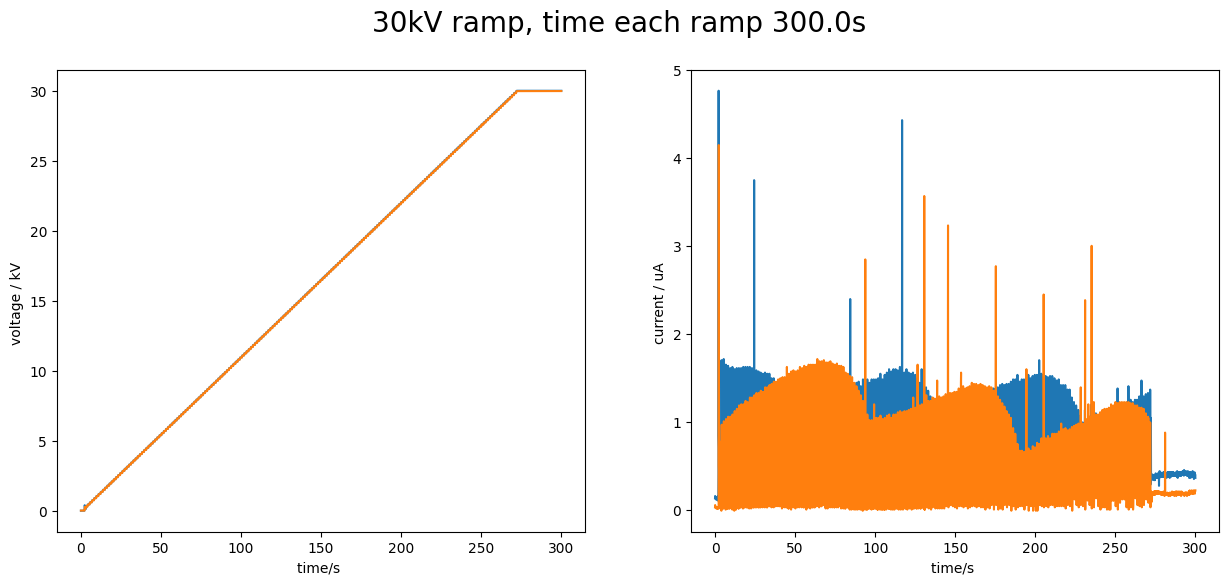

In [11]:
os.chdir("C:\\Users\\CeNTREX\\Documents\\GitHub\\1-3-IR-high_voltage\\Short IR electrodes test\\4-1-2025_test")
file_name = ['ramp_and_record_0.000V_to_10.000V_step_0.05V_in_300s_0.csv']
plot_combined(file_name)

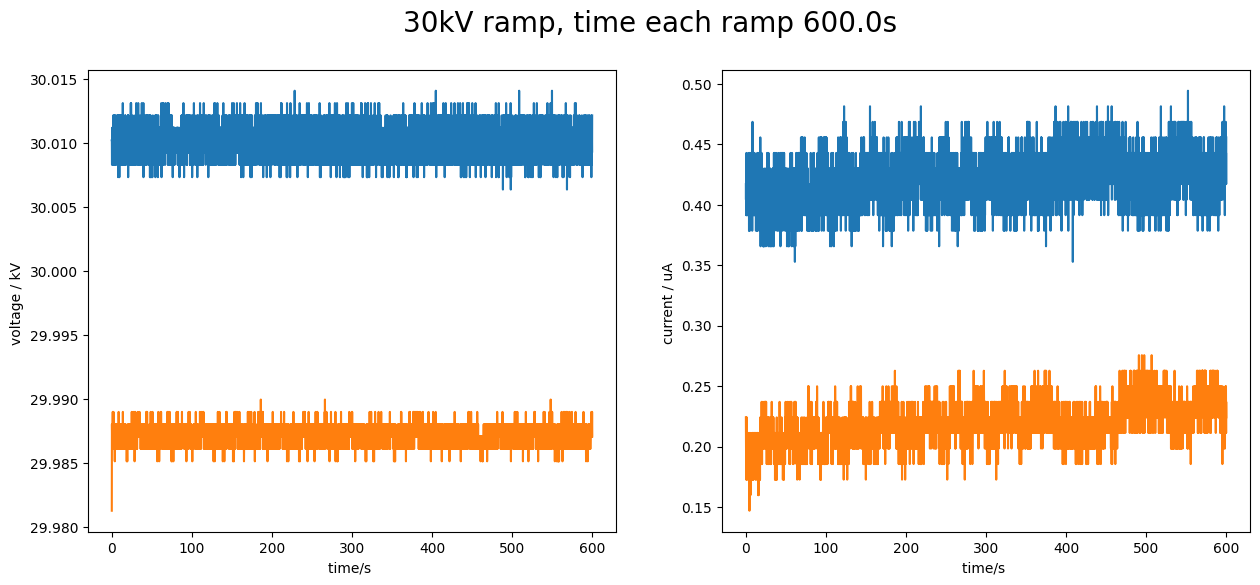

In [12]:
os.chdir("C:\\Users\\CeNTREX\\Documents\\GitHub\\1-3-IR-high_voltage\\Short IR electrodes test\\4-1-2025_test")
file_name = ['rec_at_10__recording_600s_0.csv']
plot_combined(file_name)

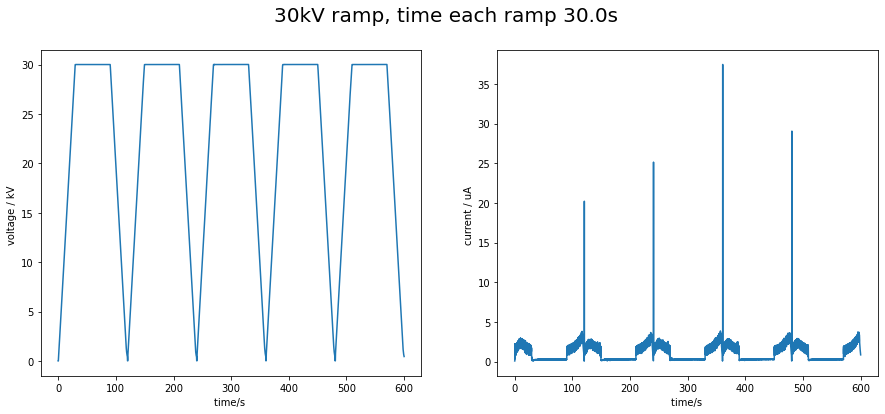

In [183]:
os.chdir('C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-27-2025_test\\30s ramp')
file_name = []
for i in range(1,6):
    file_name.append('ramp_and_record_0.000V_to_10.000V_step_0.05V_in_30s_2025-02-27_'+str(i)+'.csv')
    file_name.append('rec_at_10_recording_60s_2025-02-27_'+str(i)+'.csv')
    file_name.append('ramp_and_record_10.000V_to_0.000V_step_0.05V_in_30s_2025-02-27_'+str(i)+'.csv')
plot_combined(file_name)

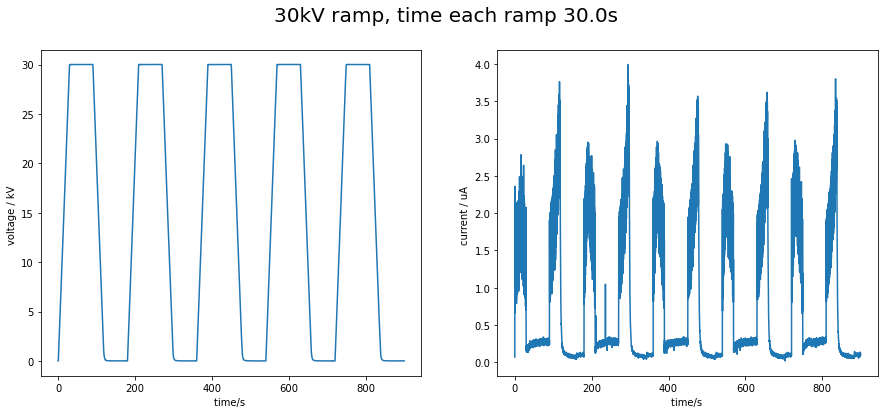

In [186]:
os.chdir('C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-27-2025_test\\30s ramp 2')
file_name = []
for i in range(5):
    file_name.append('ramp_and_record_0.000V_to_10.000V_step_0.05V_in_30s_2025-02-28_'+str(i)+'.csv')
    file_name.append('rec_at_10_'+str(i)+'_recording_60s_2025-02-28.csv')
    file_name.append('ramp_and_record_10.000V_to_0.000V_step_0.05V_in_30s_2025-02-28_'+str(i)+'.csv')
    file_name.append('rec_at_0_'+str(i)+'_recording_60s_2025-02-28.csv')
plot_combined(file_name)


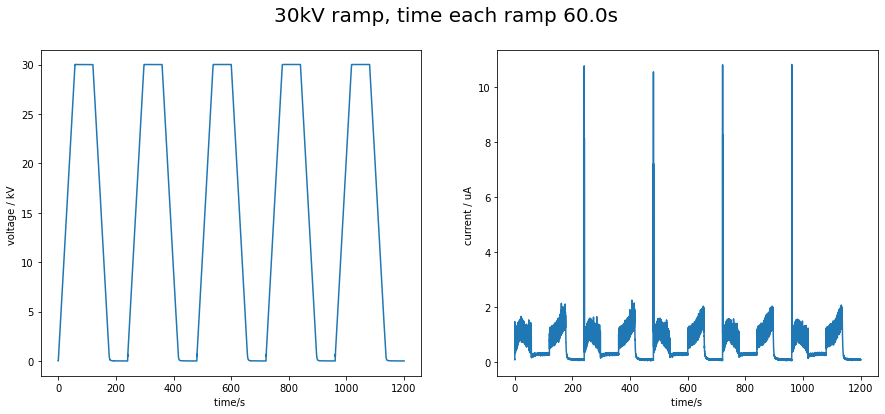

In [189]:
os.chdir('C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-27-2025_test\\60s ramp')
file_name = []
for i in range(5):
    file_name.append('ramp_and_record_0.000V_to_10.000V_step_0.03V_in_60s_2025-02-28_'+str(i)+'.csv')
    file_name.append('rec_at_10_'+str(i)+'_recording_60s_2025-02-28.csv')
    file_name.append('ramp_and_record_10.000V_to_0.000V_step_0.03V_in_60s_2025-02-28_'+str(i)+'.csv')
    file_name.append('rec_at_0_'+str(i)+'_recording_60s_2025-02-28.csv')

plot_combined(file_name)


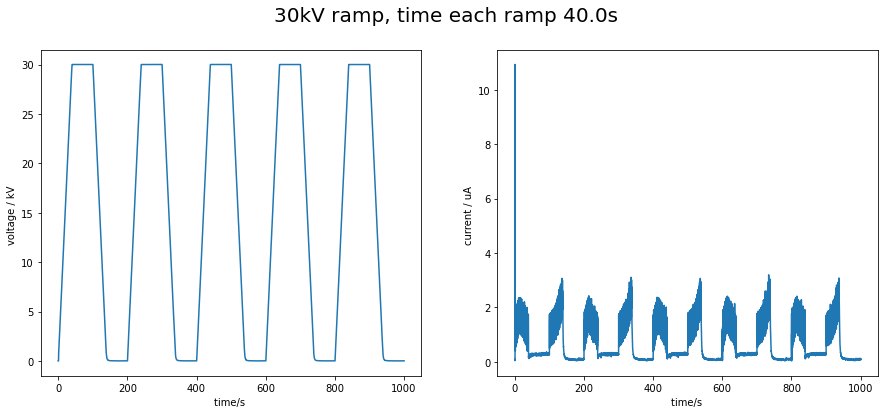

In [191]:
os.chdir('C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-27-2025_test\\40s ramp')
file_name = []
for i in range(5):
    file_name.append('ramp_and_record_0.000V_to_10.000V_step_0.05V_in_40s_2025-02-28_'+str(i)+'.csv')
    file_name.append('rec_at_10_'+str(i)+'_recording_60s_2025-02-28.csv')
    file_name.append('ramp_and_record_10.000V_to_0.000V_step_0.05V_in_40s_2025-02-28_'+str(i)+'.csv')
    file_name.append('rec_at_0_'+str(i)+'_recording_60s_2025-02-28.csv')

plot_combined(file_name)


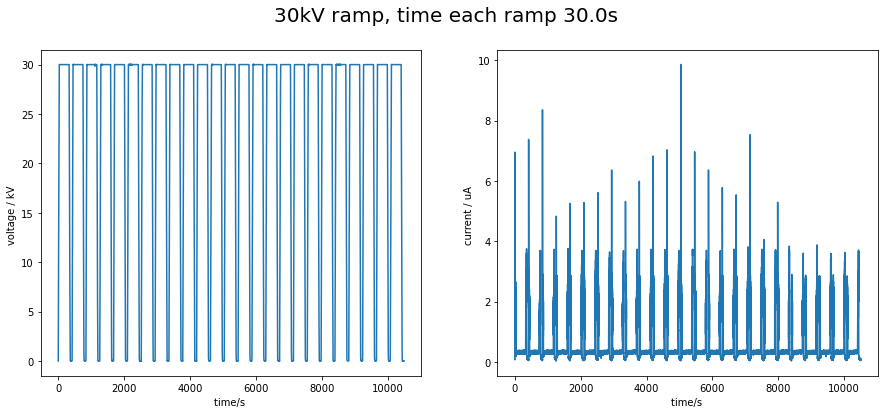

In [235]:
os.chdir('C:\\Users\\yuanhang.yang\\Documents\\GitHub\\1-3-IR-high_voltage\\Emma leakage current\\2-27-2025_test\\30s ramp long 2')
file_name = []
for i in range(15,40):
    file_name.append('ramp_and_record_0.000V_to_10.000V_step_0.05V_in_30s_'+str(i)+'.csv')
    file_name.append('rec_at_10__recording_300s_'+str(i)+'.csv')
    file_name.append('ramp_and_record_10.000V_to_0.000V_step_0.05V_in_30s_'+str(i)+'.csv')
    file_name.append('rec_at_0__recording_60s_'+str(i)+'.csv')
plot_combined(file_name)



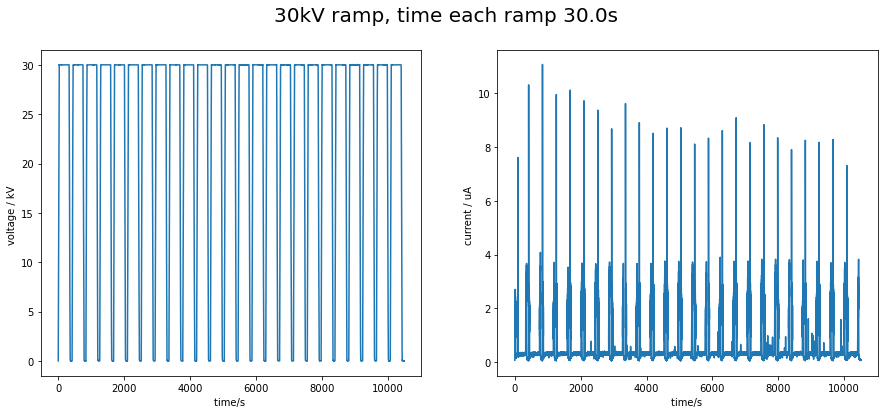

In [ ]:
os.chdir("C:\\Users\\CeNTREX\\Documents\\GitHub\\1-3-IR-high_voltage\\Short IR electrodes test\\4-1-2025_test")
file_name = []
for i in range(0,1):
    file_name.append('ramp_and_record_0.000V_to_10.000V_step_0.05V_in_30s_'+str(i)+'.csv')
    file_name.append('rec_at_10__recording_300s_'+str(i)+'.csv')
    file_name.append('ramp_and_record_10.000V_to_0.000V_step_0.05V_in_30s_'+str(i)+'.csv')
    file_name.append('rec_at_0__recording_60s_'+str(i)+'.csv')
plot_combined(file_name)